# Progression
- downloaded all slices from team 2
- annotate manually in QuPath + export as GeoJSONs
- plotting GeoJSON and saving image as png/jpg
- scan image top to bottom, then left to right (to verify not duplicate epithelium inclusion)
- get widest part of epithelium through pixel color differentiation

## Importing GeoJSONs

In [17]:
#!pip install geopandas matplotlib
#!pip install geojson pandas

In [60]:
import geojson
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON data
with open('D:\\390scans\\h2114153  h&e_ROI_1.geojson') as f:
    data = geojson.load(f)

# Convert to a GeoDataFrame
gdf = gpd.GeoDataFrame.from_features(data['features'])

# Create the plot
fig, ax = plt.subplots()
gdf.plot(ax=ax)

# Invert y-axis to match the original view if needed
plt.gca().invert_yaxis()

# Remove axis labels, ticks, etc.
ax.set_axis_off()

# Save the plot as an image without axis
output_path = 'D:\\390scans\\h2114153.png'
fig.savefig(output_path, bbox_inches='tight', pad_inches=0)

# Close the plot to free up memory
plt.close(fig)

print(f"Plot saved to {output_path}")

Plot saved to D:\390scans\h2114153.png


# Presentation 5
## Estimate Patch Size

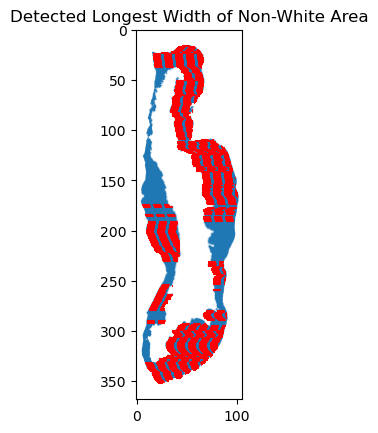

In [63]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the image
image_path = 'D:\\390scans\\h2114153.png'
image = Image.open(image_path)

# Convert the image to a numpy array for analysis
image_np = np.array(image)

# Create a binary mask for any non-white pixel (assuming white is [255, 255, 255])
non_white_mask = (image_np[:, :, 0] < 255) | (image_np[:, :, 1] < 255) | (image_np[:, :, 2] < 255)

# Scan each row to find the longest sequence of non-white pixels and their positions
widths = []
positions = []
for row_idx, row in enumerate(non_white_mask):
    max_width_in_row = 0  # Track the longest sequence in this row
    current_width = 0  # Temporary width counter for the current sequence
    start_pos = None  # Start position of the current sequence
    max_start = max_end = None  # Start and end of the longest sequence

    for col_idx, pixel in enumerate(row):
        if pixel:  # If the pixel is non-white
            if current_width == 0:
                start_pos = col_idx  # Set start position of a new sequence
            current_width += 1  # Increase the width of the current sequence
        else:  # If the pixel is white
            if current_width > max_width_in_row:
                max_width_in_row = current_width
                max_start, max_end = start_pos, col_idx - 1  # Update max sequence positions
            current_width = 0  # Reset current width counter

    # Final check in case the row ends with the longest sequence
    if current_width > max_width_in_row:
        max_width_in_row = current_width
        max_start, max_end = start_pos, len(row) - 1

    # Store the longest sequence width and its start-end positions for this row
    widths.append(max_width_in_row)
    positions.append((max_start, max_end))

# Plot the original image
plt.imshow(image_np)

# Draw dashed lines only over the longest sequence of blue pixels in each row
for row_idx, (width, (start, end)) in enumerate(zip(widths, positions)):
    if width > 0:  # Only draw if there is a non-zero longest sequence
        plt.plot([start, end], [row_idx, row_idx], color='red', linestyle='--')

plt.show()


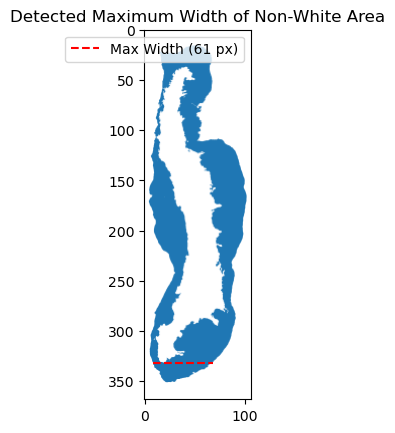

In [65]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the image
image_path = 'D:\\390scans\\h2114153.png'
image = Image.open(image_path)

# Convert the image to a numpy array for analysis
image_np = np.array(image)

# Create a binary mask for any non-white pixel (assuming white is [255, 255, 255])
non_white_mask = (image_np[:, :, 0] < 255) | (image_np[:, :, 1] < 255) | (image_np[:, :, 2] < 255)

# Scan each row to find the longest sequence of non-white pixels and their positions
max_width = 0
max_row = None
max_start = None
max_end = None

for row_idx, row in enumerate(non_white_mask):
    current_width = 0  # Temporary width counter for the current sequence
    start_pos = None  # Start position of the current sequence

    for col_idx, pixel in enumerate(row):
        if pixel:  # If the pixel is non-white
            if current_width == 0:
                start_pos = col_idx  # Set start position of a new sequence
            current_width += 1  # Increase the width of the current sequence
        else:  # If the pixel is white
            if current_width > max_width:
                max_width = current_width
                max_row = row_idx
                max_start = start_pos
                max_end = col_idx - 1  # Update max sequence positions
            current_width = 0  # Reset current width counter

    # Final check in case the row ends with the longest sequence
    if current_width > max_width:
        max_width = current_width
        max_row = row_idx
        max_start = start_pos
        max_end = len(row) - 1

# Plot the original image
plt.imshow(image_np)

# Draw a dashed line only over the longest sequence of blue pixels in the row with max width
if max_width > 0:
    plt.plot([max_start, max_end], [max_row, max_row], color='red', linestyle='--', label=f'Max Width ({max_width} px)')
    plt.legend()

plt.show()


**above code widest width would not see stroma, made adjustmens by adding a valid boolean**

     Pixel Height  Longest Width of Non-White Area  Is Valid
0               0                                0     False
1               1                                0     False
2               2                                0     False
3               3                                0     False
4               4                                0     False
..            ...                              ...       ...
364           364                                0     False
365           365                                0     False
366           366                                0     False
367           367                                0     False
368           368                                0     False

[369 rows x 3 columns]


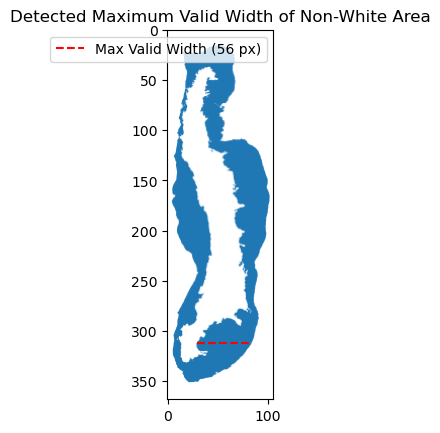

In [68]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the new uploaded image
image_path = 'D:\\390scans\\h2114153.png'
image = Image.open(image_path)

# Convert the image to a numpy array for analysis
image_np = np.array(image)

# Create a binary mask for any non-white pixel (assuming white is [255, 255, 255])
non_white_mask = (image_np[:, :, 0] < 255) | (image_np[:, :, 1] < 255) | (image_np[:, :, 2] < 255)

# Scan each row to find the longest sequence of non-white pixels and their validity
widths = []
validity = []

for row_idx, row in enumerate(non_white_mask):
    max_width_in_row = 0  # Track the longest sequence in this row
    current_width = 0  # Temporary width counter for the current sequence
    start_pos = None  # Start position of the current sequence

    # Detect the first and last non-white pixels in the row
    first_non_white = np.argmax(row) if np.any(row) else None
    last_non_white = len(row) - np.argmax(row[::-1]) - 1 if np.any(row) else None

    for col_idx, pixel in enumerate(row):
        if pixel:  # If the pixel is non-white
            if current_width == 0:
                start_pos = col_idx  # Set start position of a new sequence
            current_width += 1  # Increase the width of the current sequence
        else:  # If the pixel is white
            if current_width > max_width_in_row:
                max_width_in_row = current_width
            current_width = 0  # Reset current width counter

    # Final check in case the row ends with the longest sequence
    if current_width > max_width_in_row:
        max_width_in_row = current_width

    # Check if the sequence is valid based on boundary conditions only if start and end positions are defined
    is_valid = (
        start_pos is not None and first_non_white is not None and last_non_white is not None and 
        not (start_pos == first_non_white and (start_pos + max_width_in_row - 1) == last_non_white)
    )
    
    # Store the longest sequence width and its validity for this row
    widths.append(max_width_in_row)
    validity.append(is_valid)

# Convert results to a DataFrame for easy viewing
width_df = pd.DataFrame({
    'Pixel Height': range(len(widths)),
    'Longest Width of Non-White Area': widths,
    'Is Valid': validity
})

# Display the DataFrame
print(width_df)

# Identify the maximum valid width across all rows
valid_rows = width_df[width_df['Is Valid']]
max_valid_width_row = valid_rows['Longest Width of Non-White Area'].idxmax()
max_valid_width = valid_rows.loc[max_valid_width_row, 'Longest Width of Non-White Area']
max_row = valid_rows.loc[max_valid_width_row, 'Pixel Height']

# Get the start and end positions for plotting purposes
row = non_white_mask[max_row]
current_width = 0
start = None
for col_idx, pixel in enumerate(row):
    if pixel:
        if current_width == 0:
            start = col_idx
        current_width += 1
        if current_width == max_valid_width:
            end = col_idx
            break
    else:
        current_width = 0

plt.imshow(image_np)

# Draw a dashed line only over the longest valid sequence of blue pixels in the row with max width
plt.plot([start, end], [max_row, max_row], color='red', linestyle='--', label=f'Max Valid Width ({max_valid_width} px)')
plt.legend()
plt.show()